# Computational Methods - Lab 8
## *Diffirential equations*
Goal: to gain a skill of solving first order diffirential equations numerically

1. Use Runge–Kutta method and Adam's method (4-th order) to solve Cauchi task
2. Reseacrh error dependence over $h$ 

The task is to solve this diffirential equation (20 variant)
$$
y' + 2xy = -2x^3 \\
y\,(1) = e^{-1}
$$
Analytical solution:
$$
y = -x^2 + 1 + e^{-x^2}
$$

In [19]:
import numpy as np
from math import e
from typing import Callable
import matplotlib
import matplotlib.pyplot as plt

# Constants
N = 1000
X_0 = 1
X_1 = X_0 + 1
Y_0 = 1/e

# solution compoents
def goal(x: float) -> float:
    return -x**2 + 1 + e ** (- x**2)

def df(x: float, y: float) -> float:
    return -2 * x**3 - 2*x*y

# tests
assert goal(1) == 1/e
assert df(1, 1) == -4

# algos
# from lab 7
def int_by_trap(func: Callable, a:float, b:float, n=N):
    h = (a + b)/n
    x1 = np.linspace(a, b-h, n)
    x2 = np.linspace(a+h, b, n)
    func = np.vectorize(func)
    y = (func(x1) + func(x2))
    return h/2 * np.sum(y)

def runge_kutta(dy: Callable, x_0:float = X_0, x_1: float = X_1, y_0:float = Y_0, n=N):
    
    h = (x_1 - x_0)/n
    x = np.linspace(x_0, x_1, n)
    y = y_0 * np.ones(n)
    
    for i in range(n-1):
        x_i = x[i]
        y_i = y[i]
        k_1 = dy(x_i, y_i)
        k_2 = dy(x_i + h/2, y_i + h*k_1/2)
        k_3 = dy(x_i + h/2, y_i + h*k_2/2)
        k_4 = dy(x_i + h, y_i + h*k_3)
        
        y[i+1] = y[i] + 1/6*h*(k_1 + 2*k_2 + 2*k_3 + k_4)
    
    return y

def adams(dy: Callable, x_0:float = X_0, x_1: float = X_1, y_start:np.array = np.ones(4), n=N):
    
    h = (x_1 - x_0)/n
    x = np.linspace(x_0, x_1, n)
    y = np.ones(n)
    y[:4] = y_start
    
    for i in range(2, n):
        y[i] = y[i-1] + h/2 * (3*dy(x[i-1], y[i-1]) - dy(x[i-2], y[i-2]))
    return y

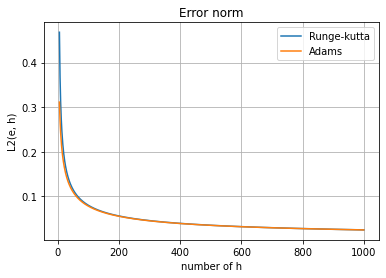

In [23]:
def L2(e, h):
    return (np.sum(e**2)) ** 0.5

def u_norm(e):
    return np.max(e)

t = np.arange(6, 1000, 1)
v = np.ones(1000-6)
b = np.ones(1000-6)

f = np.vectorize(goal)


for i in range(6, 1000):
    x = np.linspace(X_0, X_1, i)
    y_t = f(x)
    y1 = runge_kutta(df, n=i)
    y2 = adams(df, y_start=y_t[:4], n=i)
    v[i-6] = L2(abs(y_t - y1), i)
    b[i-6] = L2(abs(y_t - y2), i)



fig, ax = plt.subplots()
ax.plot(t, v)
ax.plot(t, b)

ax.set(xlabel='number of h', ylabel='L2(e, h)',
       title='Error norm')
ax.grid()
ax.legend(["Runge-kutta", "Adams"])

plt.show()


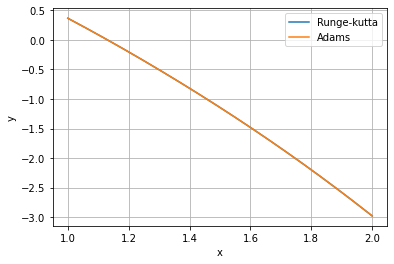

In [27]:
x = np.linspace(X_0, X_1, N)
y_t = f(x)
y2 = runge_kutta(df) 
y = adams(df, y_start=y_t[:4])

fig, ax = plt.subplots()
ax.plot(x, y2)
ax.plot(x, y)

ax.set(xlabel='x', ylabel='y')
ax.grid()
ax.legend(["Runge-kutta", "Adams"])

plt.show()